<a href="https://www.kaggle.com/code/narayanashish/us-accidents-analysis?scriptVersionId=247928972" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Loading Data......

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


## US Accident Exploratory Data Analysis

TODO - Talk about EDA
TODO - Talk about the Dataset(Source, What it contains, How it will be useful)
  - Kaggle
  - Information about Accedents
  - Can be useful to prevent accedents

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#to download file from Kaggle
from IPython.display import FileLink

# Data Prepartion & Cleaning

1. Load the file using pandas
2. Look at some information about the data & columns
3. Fix any missing or incorrrect values

In [3]:
data_filename = '/kaggle/input/us-accidents/US_Accidents_March23.csv'

In [4]:
df = pd.read_csv(data_filename)

In [5]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
len(df.columns)
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [8]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

In [10]:
df.isna().sum().sort_values(ascending = False)

End_Lng                  3402762
End_Lat                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Sunrise_Sunset             23246
Civil_Twilight             23246
Astronomical_Twilight      23246
Nautical_Twilight          23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
ID                             0
Distance(mi)                   0
Start_Lng                      0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
County    

 <h3>Percentage of Missing value per column</h3>

In [11]:
missing_percentages = df.isnull().sum().sort_values(ascending = False) /len(df)
missing_percentages

End_Lng                  4.402935e-01
End_Lat                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Sunrise_Sunset           3.007869e-03
Civil_Twilight           3.007869e-03
Astronomical_Twilight    3.007869e-03
Nautical_Twilight        3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
ID                       0.000000e+00
Distance(mi)             0.000000e+00
Start_Lng                0.000000e+00
Source                   0.000000e+00
Severity    

In [12]:
type(missing_percentages)

pandas.core.series.Series

<Axes: >

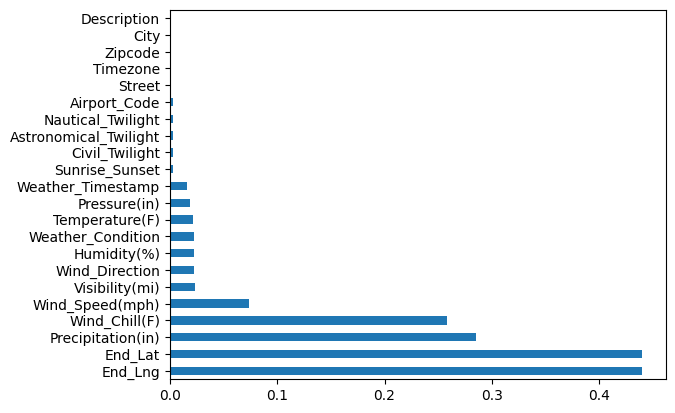

In [13]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

<h3>Remove Columns that isn't in use</h3>

## Exoloratory Analysis and Visualization

1. Columns we'll analyze -
   1. Start_Time
   2. Start_Lat & Start_LNG
   3. City
   4. Temprature
   5. Weather Condition
   6. Crosing

In [14]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [15]:
df.City

0                Dayton
1          Reynoldsburg
2          Williamsburg
3                Dayton
4                Dayton
               ...     
7728389       Riverside
7728390       San Diego
7728391          Orange
7728392     Culver City
7728393        Highland
Name: City, Length: 7728394, dtype: object

In [16]:
cities = df.City.unique()
cities[:100]

array(['Dayton', 'Reynoldsburg', 'Williamsburg', 'Westerville',
       'Columbus', 'Miamisburg', 'Johnstown', 'Dublin',
       'Canal Winchester', 'Lebanon', 'Sabina', 'Goshen', 'Waynesville',
       'Springboro', 'Carroll', 'Oregonia', 'Independence',
       'Maple Heights', 'Grove City', 'Findlay', 'Fairborn', 'Piqua',
       'New Richmond', 'Batavia', 'Galena', 'Barberton', 'Akron',
       'Mansfield', 'Cleveland', 'Bethel', 'Pataskala', 'Seville',
       'Bellville', 'Troy', 'Wilmington', 'North Olmsted', 'Groveport',
       'Orient', 'Tiro', 'Strongsville', 'Beavercreek', 'Circleville',
       'Peebles', 'Hurricane', 'Xenia', 'Elyria', 'Pickerington',
       'Burbank', 'Zanesville', 'North Baltimore', 'Mount Sterling',
       'Tipp City', 'Moraine', 'Hilliard', 'Bowling Green', 'Maineville',
       'Vermilion', 'Milford', 'Brookpark', 'Fraziers Bottom',
       'Cambridge', 'Delaware', 'Moscow', 'Oberlin', 'Sardinia',
       'Lewis Center', 'Urbancrest', 'Brecksville', 'Frankfort',

In [17]:
cities_by_accident = df.City.value_counts(ascending = False)
cities_by_accident

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
                  ...  
Rapid River           1
Cat Spring            1
Glenwood City         1
Downing               1
Marfa                 1
Name: count, Length: 13678, dtype: int64

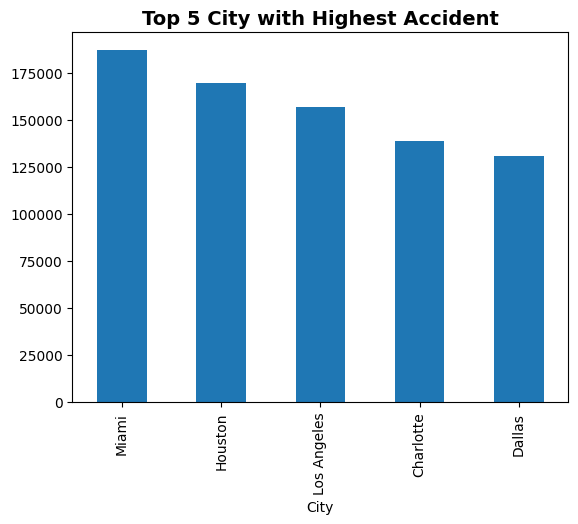

In [18]:
cities_by_accident[:5].plot(kind='bar')
plt.title("Top 5 City with Highest Accident", fontsize = 14, fontweight = "bold")
plt.show()

<Axes: ylabel='City'>

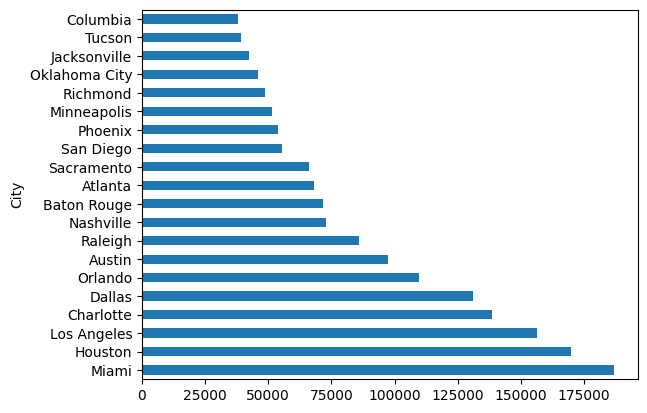

In [19]:
cities_by_accident[:20].plot(kind='barh')

### Finding the Ranking of New York 

In [20]:
city_ranking = df["City"].value_counts().reset_index()
city_ranking.columns = ["City", "Accident_Count"]

# Add ranking
city_ranking["Rank"] = city_ranking["Accident_Count"].rank(method="dense", ascending=False)

# Sort by rank
city_ranking = city_ranking.sort_values(by="Rank")

#printing rank
ny_rank = city_ranking[city_ranking["City"] == "New York"]
print(ny_rank)

        City  Accident_Count  Rank
44  New York           21699  45.0


In [21]:
#Checking if New York data shows up in the dataset if yes then how much accidents happened
count_new_york = df['City'].value_counts().get('New York', 0)
count_new_york

np.int64(21699)

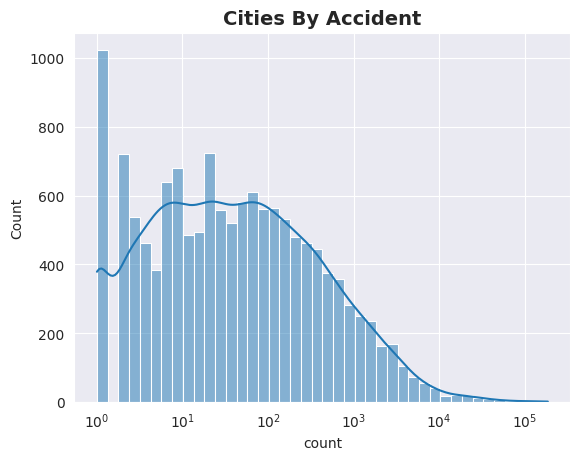

In [22]:
sns.set_style('darkgrid')
sns.histplot(cities_by_accident, kde = True, log_scale = True )
plt.title("Cities By Accident", fontsize = 14, fontweight = "bold")
plt.show()

In [23]:
# .count doesn't add null values df["City"].count()
# len add null values as well len(df['City'])
cities_by_accident[cities_by_accident == 1]

City
American Fork-Pleasant Grove    1
Waldoboro                       1
Kinsley                         1
Killona                         1
Jeanerette                      1
                               ..
Rapid River                     1
Cat Spring                      1
Glenwood City                   1
Downing                         1
Marfa                           1
Name: count, Length: 1023, dtype: int64

In [24]:
high_accident_citites = cities_by_accident[cities_by_accident >= 2000]
low_accident_cities = cities_by_accident[cities_by_accident < 2000]

In [25]:
len(high_accident_citites)/len(cities_by_accident)

0.04744845737680947

In [26]:
len(low_accident_cities)/len(cities_by_accident)

0.9525515426231905

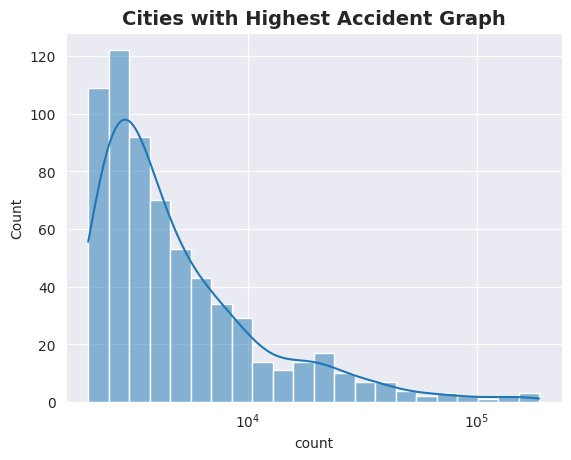

In [27]:
len(high_accident_citites)/len(cities_by_accident)
sns.histplot(high_accident_citites, kde = True, log_scale = True )
plt.title("Cities with Highest Accident Graph", fontsize = 14, fontweight = "bold")
plt.show()

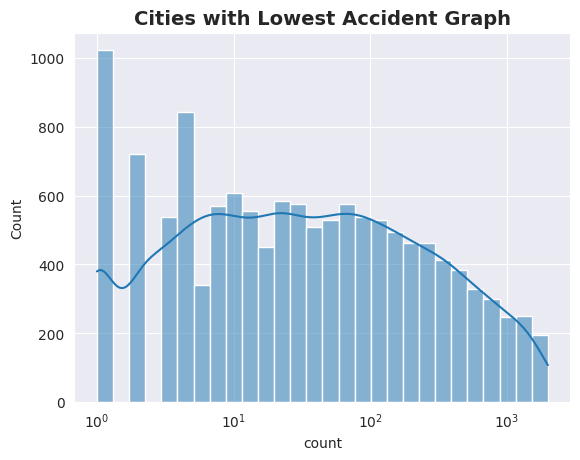

In [28]:
len(low_accident_cities)/len(cities_by_accident)
sns.histplot(low_accident_cities, kde = True, log_scale = True )
plt.title("Cities with Lowest Accident Graph", fontsize = 14, fontweight = "bold")
plt.show()

### Accident by Date & Time

In [29]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

##### Fixing Time Stamp Format

In [30]:
#df.iloc[3639776]['Start_Time'] 
df.Start_Time[3639776]

'2017-07-23 05:18:46.000000000'

In [31]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='ISO8601')
df['Start_Time']

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
7728389   2019-08-23 18:03:25
7728390   2019-08-23 19:11:30
7728391   2019-08-23 19:00:21
7728392   2019-08-23 19:00:21
7728393   2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: datetime64[ns]

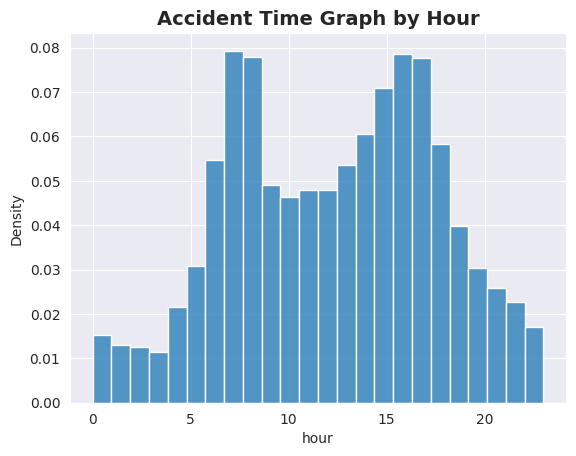

In [32]:
#Converting Timestamp to hour
#Accident Time Graph by Hour
df['hour'] = df['Start_Time'].dt.hour
sns.histplot(df['hour'], bins = 24, stat="density")
plt.title("Accident Time Graph by Hour", fontsize=14, fontweight='bold')
plt.show()

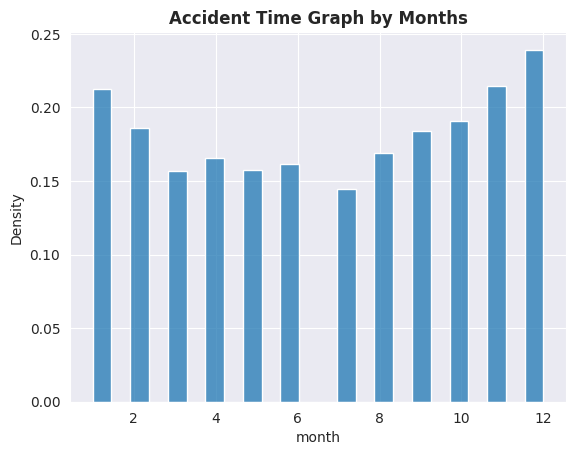

In [33]:
#Accident Time Graph by Months

df['month'] = df['Start_Time'].dt.month
sns.histplot(df['month'], bins = 24, stat="density")
plt.title("Accident Time Graph by Months", fontsize=12, fontweight='bold')
plt.show()


<Axes: xlabel='Start_Time', ylabel='Density'>

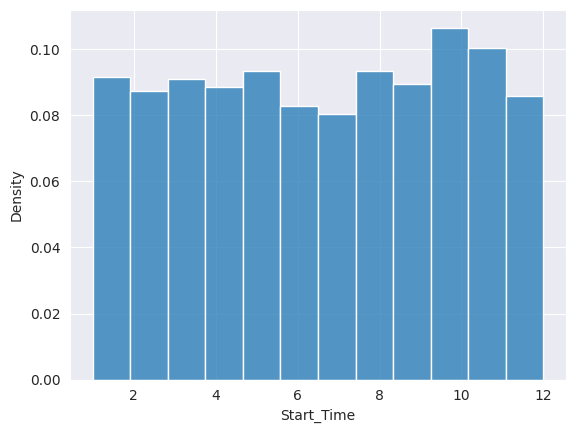

In [34]:
#Accident Time Graph by Months of Selected Year
df_2023 = df[df.Start_Time.dt.year == 2018]
sns.histplot(df_2023.Start_Time.dt.month, bins = 12, stat="density")



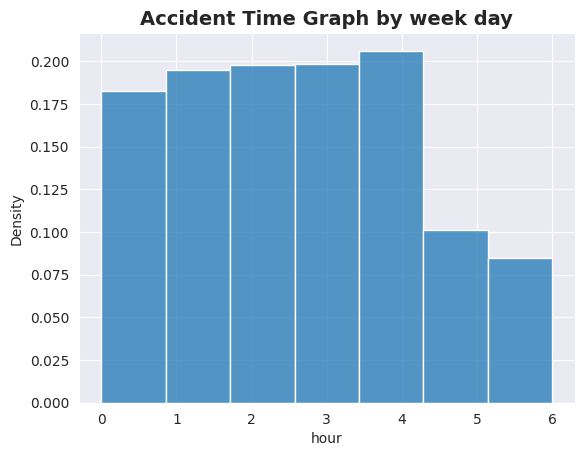

In [35]:
#Converting Timestamp to hour
#Accident Time Graph by week day
df['hour'] = df['Start_Time'].dt.dayofweek
sns.histplot(df['hour'], bins = 7, stat="density")
plt.title("Accident Time Graph by week day", fontsize=14, fontweight='bold')
plt.show()

<Axes: xlabel='Start_Time', ylabel='Density'>

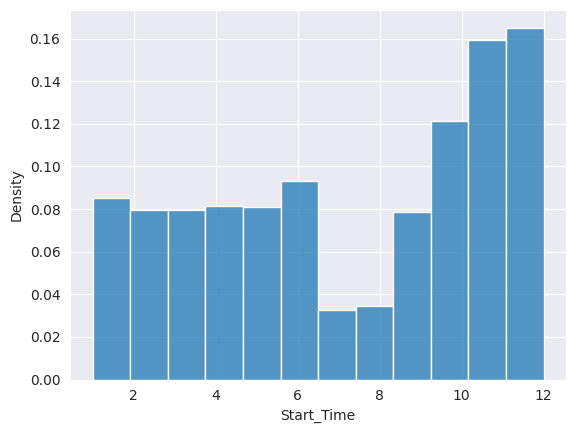

In [36]:
#Checking stats during 2020 (Lockdown)
df_2020 = df[df.Start_Time.dt.year == 2020]
sns.histplot(df_2020.Start_Time.dt.month, bins = 12, stat="density")

<Axes: ylabel='count'>

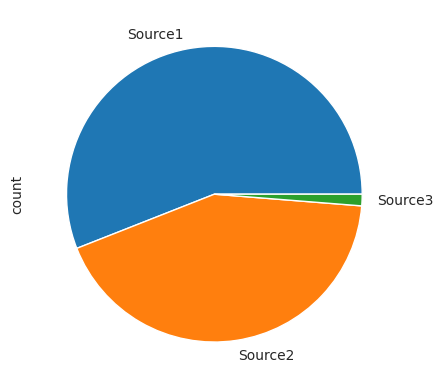

In [37]:
df.Source.value_counts().plot(kind = 'pie')

### Accident or Accident by Temprature

In [38]:
#Converting F to C
df["Temperature(F)"] = (df["Temperature(F)"] - 32) * 5/9

df.rename(columns={"Temperature(F)": "Temperature_C"}, inplace=True)
df['Temperature_C']



0           2.722222
1           3.277778
2           2.222222
3           1.722222
4           2.222222
             ...    
7728389    30.000000
7728390    21.111111
7728391    22.777778
7728392    21.666667
7728393    26.111111
Name: Temperature_C, Length: 7728394, dtype: float64

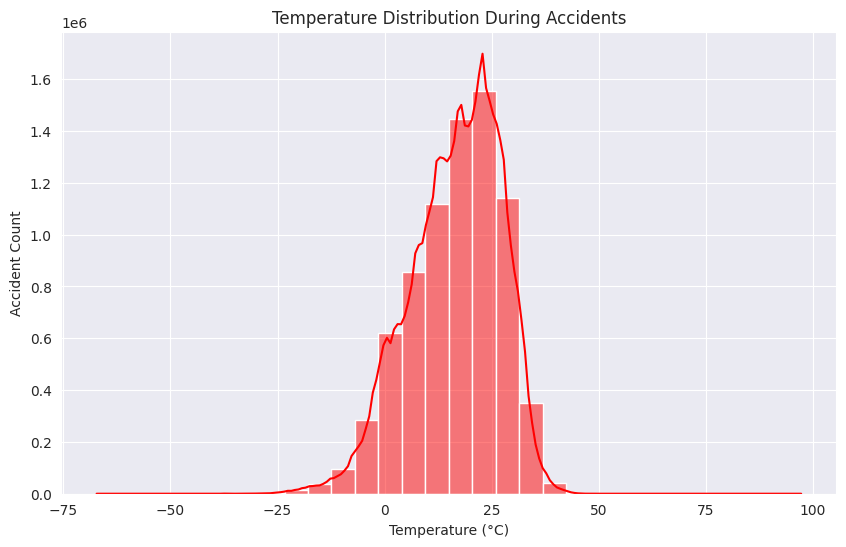

In [39]:
#plotting chart

plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature_C'], bins=30, kde=True, color="red")
plt.title("Temperature Distribution During Accidents")
plt.xlabel("Temperature (°C)")
plt.ylabel("Accident Count")
plt.show()

/tmp/ipykernel_74/3637466337.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accident_counts.index, y=accident_counts.values, palette="coolwarm")


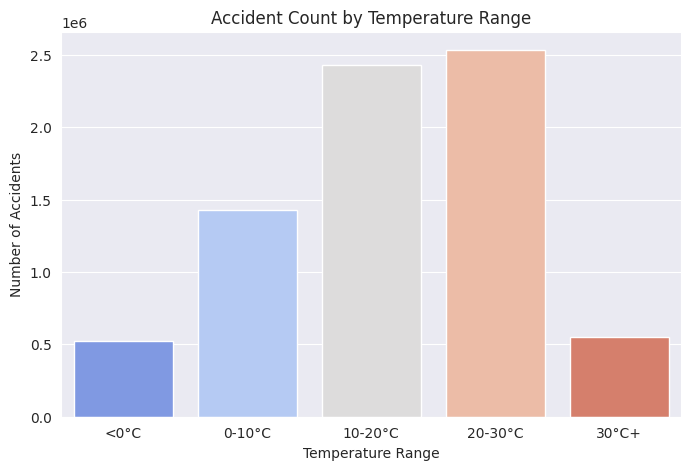

In [40]:
df["Temp_Category"] = pd.cut(df["Temperature_C"], bins=[-10, 0, 10, 20, 30, 40], labels=["<0°C", "0-10°C", "10-20°C", "20-30°C", "30°C+"])
accident_counts = df["Temp_Category"].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=accident_counts.index, y=accident_counts.values, palette="coolwarm")
plt.title("Accident Count by Temperature Range")
plt.xlabel("Temperature Range")
plt.ylabel("Number of Accidents")
plt.show()

In [41]:
#Aggregate
accident_counts = df.groupby("Temperature_C")["City"].count().reset_index()
accident_counts.columns = ["Temperature_C", "Accident_Count"]
most_accidents_temp = accident_counts.loc[accident_counts["Accident_Count"].idxmax()]

print(f"Most accidents occur at {most_accidents_temp['Temperature_C']}°C with {most_accidents_temp['Accident_Count']} accidents.")


Most accidents occur at 25.0°C with 170984.0 accidents.


### Accident by State

In [42]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature_C', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'hour', 'month', 'Temp_Category'],
      dtype='object')

In [43]:
#Total USA states in this dataset
df.State.nunique()

49

In [44]:
df["State"].head(5)

0    OH
1    OH
2    OH
3    OH
4    OH
Name: State, dtype: object

<Axes: xlabel='State'>

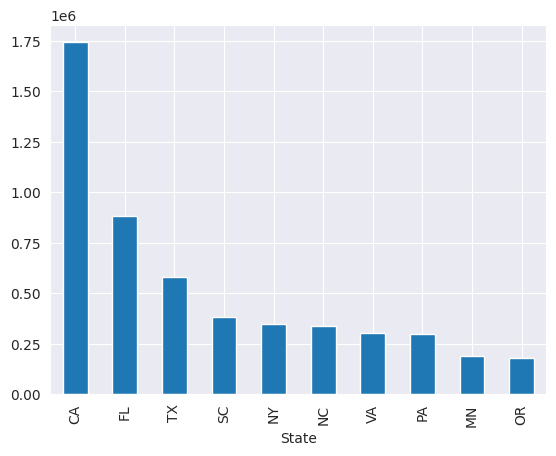

In [45]:
accident_by_state = df["State"].value_counts(ascending = False)
accident_by_state.head(10).plot(kind = 'bar')

#### Downloading Accident Description for Word Analysis 

In [46]:
df['Description'].to_csv('Accident_Description.csv', index=False)
FileLink('Accident_Description.csv')

/kaggle/working/Accident_Description.csv

### Accident Severity Prediction (Classification) Machine Learning

In [47]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,hour,month,Temp_Category
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,Night,Night,Night,Night,0,2,0-10°C
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,Night,Night,Night,Day,0,2,0-10°C
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,True,False,Night,Night,Day,Day,0,2,0-10°C
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,Night,Day,Day,Day,0,2,0-10°C
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,True,False,Day,Day,Day,Day,0,2,0-10°C


In [48]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature_C', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'hour', 'month', 'Temp_Category'],
      dtype='object')

In [49]:
print(df.isnull().sum())

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature_C             163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [50]:
df["Severity"].unique()

array([3, 2, 1, 4])

### Handling Missing Values

In [51]:
df.dropna(subset=['Severity', 'Temperature_C', 'Visibility(mi)', 'Humidity(%)'], inplace=True)
df['Weather_Condition'].fillna(df['Weather_Condition'].mode()[0], inplace=True)


/tmp/ipykernel_74/14936655.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weather_Condition'].fillna(df['Weather_Condition'].mode()[0], inplace=True)


In [52]:
# Convert timestamp to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Extract useful time-based features
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek
df['Is_Rush_Hour'] = df['Hour'].apply(lambda x: 1 if (7 <= x <= 10) or (16 <= x <= 19) else 0)

# Convert categorical variables to numerical
df = pd.get_dummies(df, columns=['Weather_Condition', 'State'], drop_first=True)

## Training the Model

In [53]:
from sklearn.model_selection import train_test_split  

# Select features and target
features = ['Temperature_C', 'Visibility(mi)', 'Humidity(%)', 'Hour', 'DayOfWeek', 'Is_Rush_Hour'] + list(df.columns[df.columns.str.startswith('Weather_Condition_')]) + list(df.columns[df.columns.str.startswith('State_')])  
X = df[features]
y = df['Severity']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

### Logistic regression

In [55]:
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, classification_report  

# Train model
lr = LogisticRegression(max_iter=1000)  
lr.fit(X_train, y_train)  

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluate model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7952466243594367


/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00     13242
           2       0.80      0.99      0.89   1197351
           3       0.43      0.04      0.07    252955
           4       0.00      0.00      0.00     39426

    accuracy                           0.80   1502974
   macro avg       0.31      0.26      0.24   1502974
weighted avg       0.71      0.80      0.72   1502974



## Ask and Answer Question

1. Are there more accident in warmer or colder area?
2. Which 5 states have the highest causalities? How about per capita?
3. Does New York show up in the data? If yes, then why is the count lower if it is the highest populated city in US?
4. Among the top 100 cities in no of accident, which state they belong to most frequently?
5. What time of the day are accidents most frequent in?
6. Which day of the week have most accidents?
7. Which months have most accidents?
8. when is accident per unit highest?
9. Most accidents occur at 25.0°C with 170984.0 accidents.


## Summary and Conclusion

1. Less than 4% cities have more than 2000 accidents
2. 1023 cities have only one accident recorded
3. A high percentages of accidents occured between 7AM to 10AM and 3PM to 8PM. Looks like accidents happens most at evening
4. New York City has total 21699 accidents. Compare to Population it has very low recorded accidents
5. There are also missing data for year 2023, 2016 and 2020
6. New York City has the highest population but ranks 45th place in Accidentes
7. New York City and New York State 